We look at data from customers that already have churned (response) and their characteristics / behaviour (predictors) before the churn happened. By fitting a statistical model that relates the predictors to the response, we will try to predict the response for existing customers.

In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# Loading the CSV with pandas

data = pd.read_csv('Telco_Customer_Churn.csv')

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
from pylab import rcParams

In [4]:
# Data to plot
sizes = data['Churn'].value_counts(sort = True)

In [5]:
type(sizes)

pandas.core.series.Series

In [6]:
sizes.head()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5
labels = ['No','Yes']

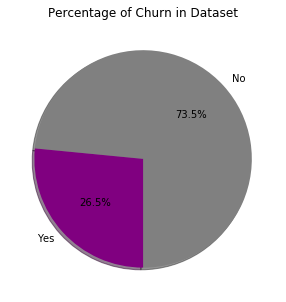

In [14]:
# Plot
plt.pie(sizes, colors=colors,
        autopct='%1.1f%%',labels=labels, shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

### Data Preparation and Feature Engineering

Dropping irrelevant data

In [15]:
data.drop(['customerID'], axis=1, inplace=True)

Missing Values

In [37]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Converting Numerical Features From Object

In [38]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Our machine learning model can only work with actual numeric data. Hence ...

In [39]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [40]:
data.iloc[488,:]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [50]:
data1 = data.copy()

In [51]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [52]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [54]:
data = data.fillna(method='ffill')

In [55]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [56]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [57]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Categorical data into numerical data

In [73]:
data_dummies = pd.get_dummies(data[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']])

In [74]:
data_dummies.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [75]:
data_no_dummies = data[['SeniorCitizen','tenure','MonthlyCharges' ,'TotalCharges' ,'Churn' ]]

In [76]:
data_dummies.shape

(7043, 41)

In [77]:
data_no_dummies.shape

(7043, 5)

In [78]:
df_new = pd.concat([data_dummies, data_no_dummies], axis=1)

In [79]:
df_new.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,1,0,0,1,...,1,0,0,1,0,0,1,29.85,29.85,No
1,0,1,1,0,1,0,0,1,1,0,...,0,0,0,0,1,0,34,56.95,1889.50,No
2,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,1,0,2,53.85,108.15,Yes
3,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,45,42.30,1840.75,No
4,1,0,1,0,1,0,0,1,1,0,...,1,0,0,1,0,0,2,70.70,151.65,Yes


In [80]:
data = df_new.copy()

Splitting

In [82]:
Y = data["Churn"].values
X = data.drop(labels = ["Churn"],axis = 1).values

In [84]:
Y.shape

(7043,)

In [85]:
X.shape

(7043, 45)

In [86]:
Y

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [87]:
X

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 2.9850e+01,
        2.9850e+01],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.4000e+01, 5.6950e+01,
        1.8895e+03],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.0000e+00, 5.3850e+01,
        1.0815e+02],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.1000e+01, 2.9600e+01,
        3.4645e+02],
       [0.0000e+00, 1.0000e+00, 0.0000e+00, ..., 4.0000e+00, 7.4400e+01,
        3.0660e+02],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 6.6000e+01, 1.0565e+02,
        6.8445e+03]])

In [88]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [90]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7955997161107168


------------------------------------EOF------------------------------------------